In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import os

In [72]:
arr = []

for i in range(1, 4):
    for j in range(len(os.listdir(f"indianfood/{os.listdir("indianfood")[i]}"))):
        if os.listdir(f"indianfood/{os.listdir("indianfood")[i]}")[j] == '.ipynb_checkpoints':
            pass
        else:
            # print(os.listdir(f"deaths/{os.listdir("deaths")[i]}")[j])
            arr.append([i])

labels = np.array(arr)

In [73]:
train_image = []
for i in range(1, 4):
        for j in range(len(os.listdir(f"indianfood/{os.listdir("indianfood")[i]}"))):
            if os.listdir(f"indianfood/{os.listdir("indianfood")[i]}")[j] == '.ipynb_checkpoints':
                pass
            else:
                img = image.load_img(f"indianfood/{os.listdir("indianfood")[i]}/{os.listdir(f"indianfood/{os.listdir("indianfood")[i]}")[j]}", target_size=(150, 150, 3))
                img = image.img_to_array(img)
                img /= 255
                train_image.append(img)

train_images = np.array(train_image)

In [74]:
np.random.seed(23)
np.random.shuffle(train_images)
np.random.seed(23)
np.random.shuffle(labels)

Text(0.5, 1.0, 'Pizza')

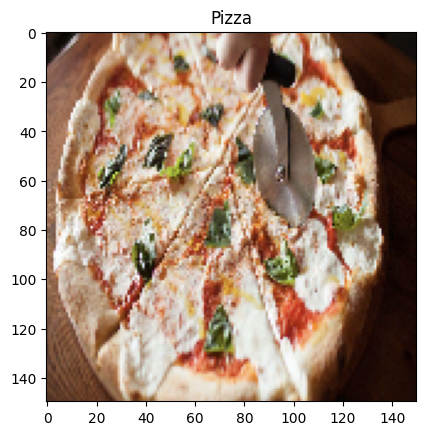

In [81]:
PHOTO_INDEX = 105
reasons = [_, "Burger", "Butter Naan", "Pizza", "Suicide"]
plt.imshow(train_images[PHOTO_INDEX])
plt.title(reasons[labels[PHOTO_INDEX][0]])

In [82]:
len(labels)
labels.shape

(899, 1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train_images, labels, test_size=0.2)

In [53]:
model = Sequential()
model.add(tf.keras.Input(shape=(150, 150, 3)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(2, 2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 71, 71, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │          55,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,094 (551.15 KB)

 Trainable params: 141,094 (551.15 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 603ms/step - accuracy: 0.7661 - loss: 0.5199
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 566ms/step - accuracy: 0.8017 - loss: 0.4876
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 581ms/step - accuracy: 0.8411 - loss: 0.3907


In [86]:
X_train.shape

(719, 150, 150, 3)

In [87]:
y_train.shape

(719, 1)

In [88]:
y_preds = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


In [18]:
y_preds

array([[2.0646667e-05, 5.4780459e-01, 8.6361492e-01, 2.1300180e-01,
        7.8295553e-01, 8.7176597e-01],
       [7.8358664e-04, 4.5693967e-01, 7.9281259e-01, 2.8646830e-01,
        6.6431165e-01, 8.0539352e-01],
       [3.3553572e-06, 3.3084032e-01, 8.2194912e-01, 1.1048240e-01,
        8.3033395e-01, 9.1725868e-01],
       [1.6483317e-04, 5.1332974e-01, 7.8212649e-01, 2.0216514e-01,
        6.6013956e-01, 8.6079144e-01],
       [1.7553173e-05, 3.5448074e-01, 5.5781484e-01, 8.9585692e-02,
        8.7401390e-01, 9.0520859e-01],
       [7.6942390e-04, 5.6381452e-01, 7.4169385e-01, 2.7579805e-01,
        6.9147694e-01, 8.4277987e-01],
       [1.0645072e-02, 4.6043465e-01, 6.4414519e-01, 2.6172471e-01,
        6.3354659e-01, 6.7688942e-01],
       [1.0784324e-03, 5.5112034e-01, 7.9014349e-01, 2.8080937e-01,
        5.7527715e-01, 8.4449118e-01],
       [1.0131767e-04, 4.9354470e-01, 8.0158412e-01, 1.5880413e-01,
        6.3945365e-01, 9.0673274e-01],
       [4.1691613e-04, 5.4007256e-01,

In [19]:
y_test

array([[1],
       [3],
       [1],
       [1],
       [2],
       [2],
       [2],
       [4],
       [2],
       [5],
       [4],
       [5],
       [1],
       [5],
       [2]])

In [20]:
for i in range(len(y_preds)):
    print(y_preds[i].argmax())

5
5
5
5
5
5
5
5
5
5
4
5
2
5
5


In [89]:
preds_list = [y_preds[i].argmax() for i in range(len(y_preds))]
y_test_list = [y_test[i][0] for i in range(len(y_test))]

print(f"Accuracy: {len([preds_list[i] for i in preds_list if preds_list[i] == y_test_list[i]]) / len(y_test_list):.2f}%")

Accuracy: 1.00%


In [90]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_list, preds_list)
print(f"Accuracy: {score:.2f}%")

Accuracy: 0.76%


In [96]:
img = image.load_img("burger.jpeg", target_size=(150, 150, 3))
img = image.img_to_array(img)
img /= 255
img = np.array([img])
img.shape

(1, 150, 150, 3)

In [1]:
plt.imshow(img[0])
plt.show()

NameError: name 'plt' is not defined

In [98]:
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [99]:
print(reasons[prediction.argmax()])

Burger
